In [2]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

api_key = "8b937dc1f1b872481f8e25196fd0d945"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [6]:
# OpenWeatherMap API Key
api_key = "8b937dc1f1b872481f8e25196fd0d945"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all cities have records, return data
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record = record + 1
        
        # Wait a second to not exceed rate limit
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Dong Hoi
Processing Record 2 | Rikitea
Processing Record 3 | Chuy
Processing Record 4 | Mar del Plata
Processing Record 5 | Lebu
Processing Record 6 | Puerto Ayora
Processing Record 7 | Vaini
Processing Record 8 | Cockburn Town
Processing Record 9 | Fortuna
Processing Record 10 | Bethel
Processing Record 11 | Mahebourg
Processing Record 12 | Albany
Processing Record 13 | Bredasdorp
Processing Record 14 | Georgetown
Processing Record 15 | Khatanga
Processing Record 16 | Ushuaia
Processing Record 17 | Burnie
Processing Record 18 | Abapo
Processing Record 19 | Saint-Augustin
Processing Record 20 | Ancud
Processing Record 21 | San Cristobal
Processing Record 22 | Yumen
Processing Record 23 | Bluff
Processing Record 24 | Saint-Philippe
Processing Record 25 | Bandarbeyla
Processing Record 26 | Provideniya
Processing Record 27 | Saskylakh
Processing Record 28 | Saint George
Processing Record 29 | Bastrop
Processing

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [8]:
# Display DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dong Hoi,92,VN,1547666662,100,17.48,106.60,67.28,17.13
1,Rikitea,88,PF,1547666664,95,-23.12,-134.97,80.82,10.65
2,Chuy,88,UY,1547666665,92,-33.69,-53.46,79.88,11.99
3,Mar del Plata,24,AR,1547666549,33,-46.43,-67.52,68.18,11.21
4,Lebu,0,ET,1547666667,50,8.96,38.73,52.56,3.94


In [9]:
#Save DataFrame to csv
export_csv = weather_data.to_csv (r'C:\Users\Frank Garcia\Desktop\Resources\Homework6_Python_API\weather_data.csv', index = None, header=True)

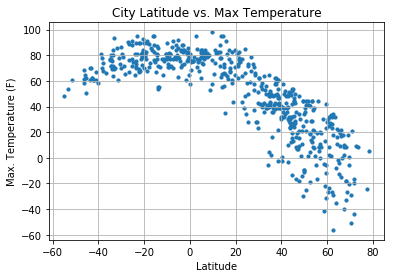

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Temp_Plot.png")

# Show plot
plt.show()

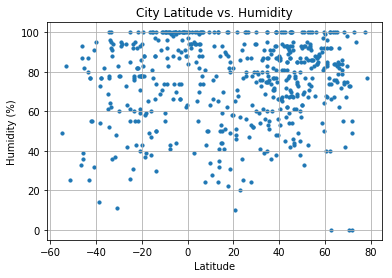

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Humidity_Plot.png")

# Show plot
plt.show()

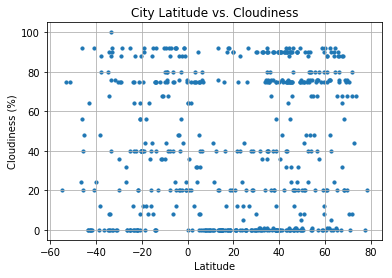

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_Cloudiness_Plot.png")

# Show plot
plt.show()

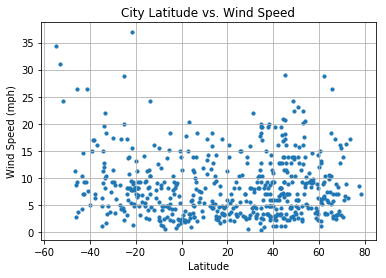

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat_WindSpeed_plot.png")

# Show plot
plt.show()